In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_excel("spam-_1_.xlsx")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
105,ham,Thanks a lot for your wishes on my birthday. T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4805,ham,Match started.india &lt;#&gt; for 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4096,ham,Are you happy baby ? Are you alright ? Did you...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2906,spam,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1575,ham,You all ready for * big day tomorrow?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(5407, 10)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5331
Unnamed: 3    5376
Unnamed: 4    5390
Unnamed: 5    5402
Unnamed: 6    5405
Unnamed: 7    5405
Unnamed: 8    5406
Unnamed: 9    5406
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5407 non-null   object
 1   v2          5407 non-null   object
 2   Unnamed: 2  76 non-null     object
 3   Unnamed: 3  31 non-null     object
 4   Unnamed: 4  17 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
 7   Unnamed: 7  2 non-null      object
 8   Unnamed: 8  1 non-null      object
 9   Unnamed: 9  1 non-null      object
dtypes: object(10)
memory usage: 422.6+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
3103,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
4653,ham,O we cant see if we can join denis and mina? O...
4665,ham,Send me your resume:-)
3657,ham,We'll join the &lt;#&gt; bus
3238,ham,Eh sorry leh... I din c ur msg. Not sad alread...


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
825,ham,"Sir, I have been late in paying rent for the p..."
4292,ham,Can you tell Shola to please go to college of ...
2674,ham,Play w computer? Aiyah i tok 2 u lor?
3857,spam,You have been specially selected to receive a ...
3914,ham,University of southern california.


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

809

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(4598, 2)

2.EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4171
1     427
Name: count, dtype: int64

In [22]:
df.shape

(4598, 2)

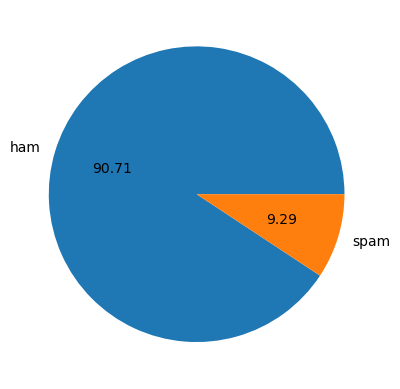

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:

# Data is imbalanced

In [25]:
import nltk 


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
def safe_len(x):
    if isinstance(x, str):
        return len(x)
    else:
        return 0

In [28]:
df['num_characters'] = df['text'].apply(safe_len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5400,0,Huh y lei...,12
5401,1,REMINDER FROM O2: To get 2.50 pounds free call...,147
5404,0,"Pity, * was in mood for that. So...any other s...",57
5405,0,The guy did some bitching but I acted like i'd...,125


In [31]:
def safe_word_count(x):
    if isinstance(x, str):
        return len(nltk.word_tokenize(x))
    else:
        return 0

In [32]:
# num of words
df['num_words'] = df['text'].apply(safe_word_count)

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
def safe_sentence_count(x):
    if isinstance(x, str):
        return len(nltk.sent_tokenize(x))
    else:
        return 0

In [35]:
df['num_sentences'] = df['text'].apply(safe_sentence_count)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4598.000000,4598.000000,4598.000000
mean,77.590474,18.419748,1.938017
std,64.073311,15.458519,1.478387
min,0.000000,0.000000,0.000000
25%,35.000000,9.000000,1.000000
50%,57.000000,14.000000,1.000000
75%,109.000000,25.000000,2.000000
max,1146.000000,331.000000,38.000000


In [38]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4171.000000,4171.000000,4171.000000
mean,71.773915,17.515704,1.844162
std,63.279639,15.652688,1.452914
min,0.000000,0.000000,0.000000
25%,33.500000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,1146.000000,331.000000,38.000000


In [39]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,427.000000,427.000000,427.000000
mean,134.407494,27.250585,2.854801
std,39.210073,9.706997,1.411720
min,0.000000,0.000000,0.000000
25%,124.000000,23.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,545.000000,145.000000,8.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

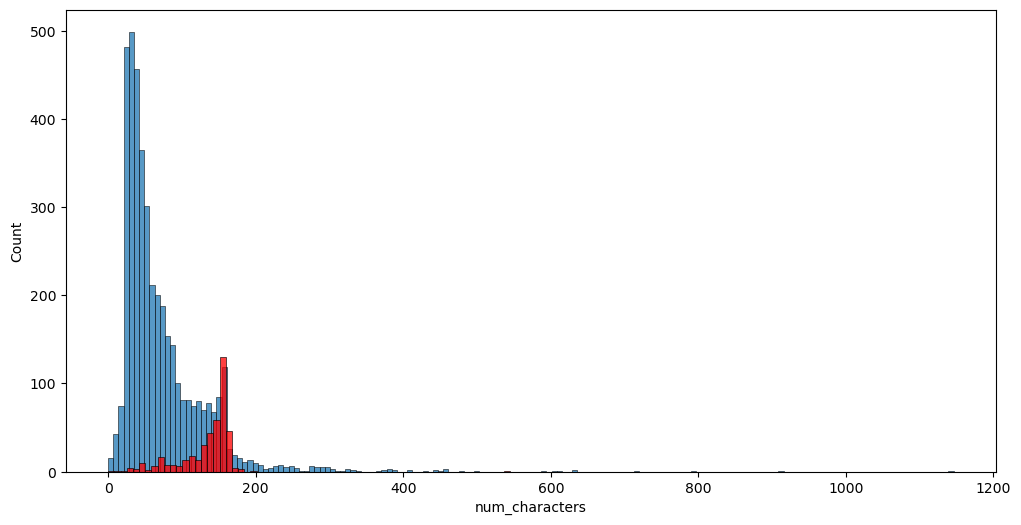

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

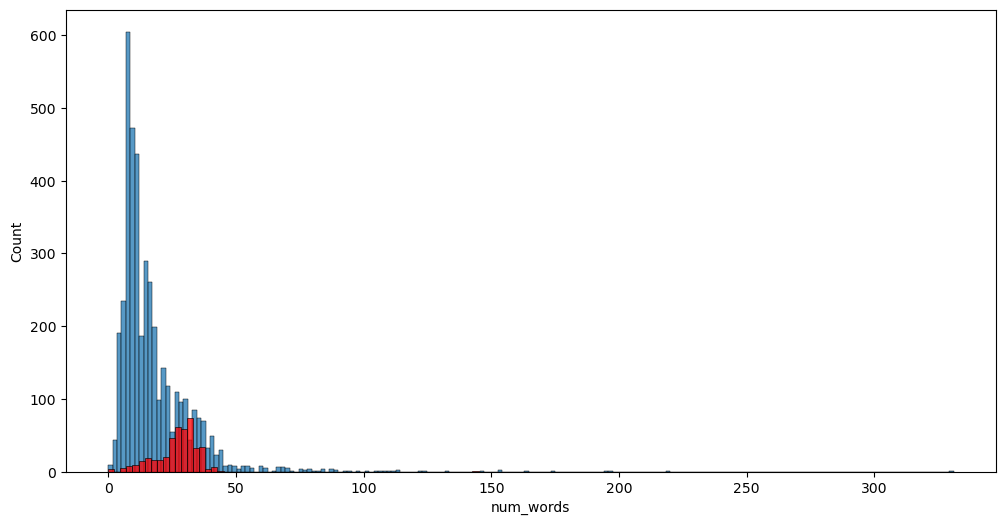

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

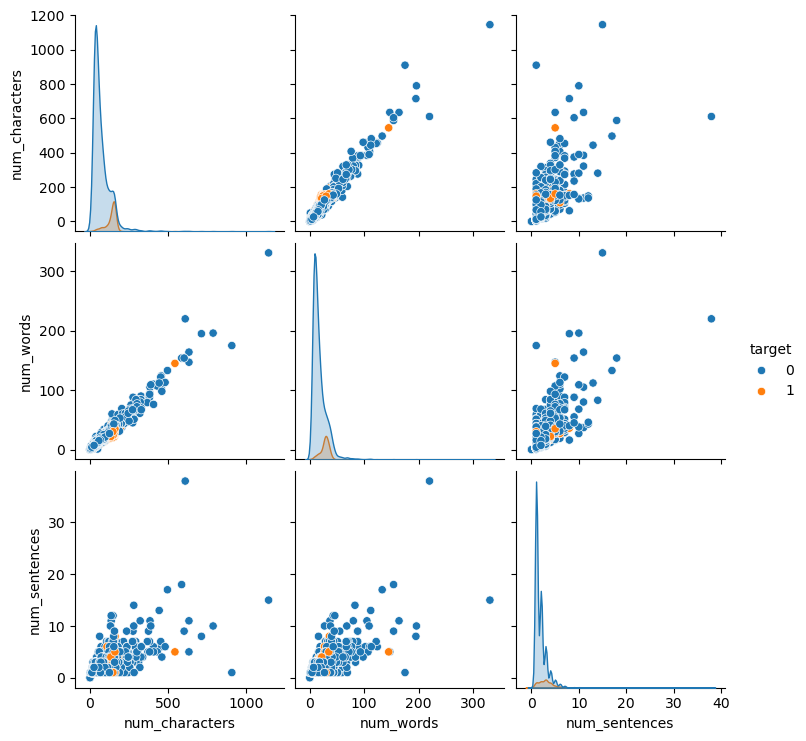

In [43]:
sns.pairplot(df,hue='target')

In [44]:
numeric_df = df.select_dtypes(include=['number'])

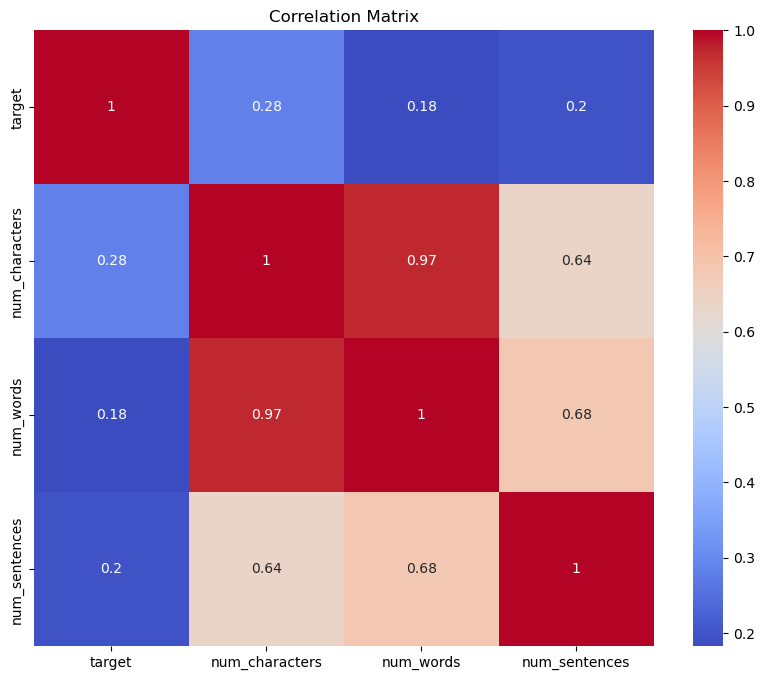

In [46]:
# Compute the correlation matrix 
corr_matrix = numeric_df.corr() # Plot the heatmap 
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()

In [47]:
nltk.download('punkt') 
nltk.download('stopwords')

import nltk 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def transform_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
                
                text = y[:]
                y.clear()
                for i in text:
                    if i not in stopwords.words('english') and i not in string.punctuation:
                        y.append(i)
                        
                        text = y[:]
                        y.clear()
                        
                        for i in text:
                            y.append(ps.stem(i))
                            return " ".join(y)
                    else:
                        return " "

In [49]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

' '

In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [54]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

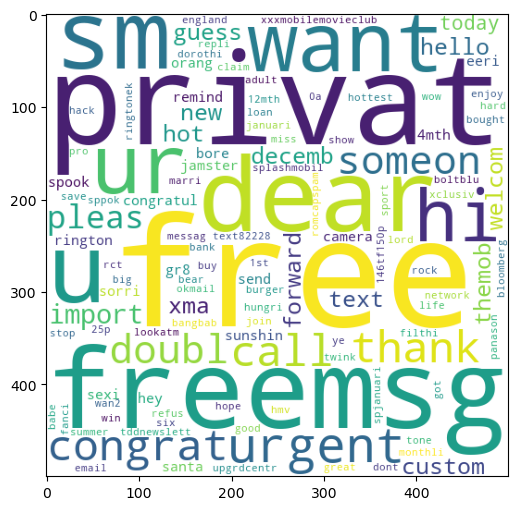

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

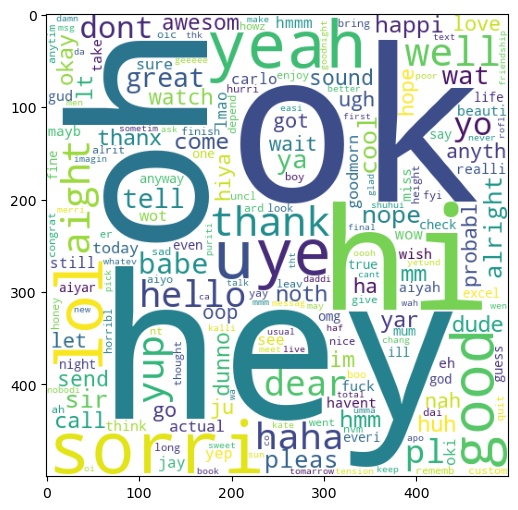

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [61]:
spam_corpus = []

# Filter out None values before processing
for msg in df[df['target'] == 1]['transformed_text'].dropna().tolist():
    for word in msg.split():
        spam_corpus.append(word)

        

In [64]:
len(spam_corpus)

324

In [65]:
from collections import Counter


In [66]:
# Count the most common words in the spam corpus 
spam_word_counts = Counter(spam_corpus).most_common(30)

In [67]:
spam_df = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

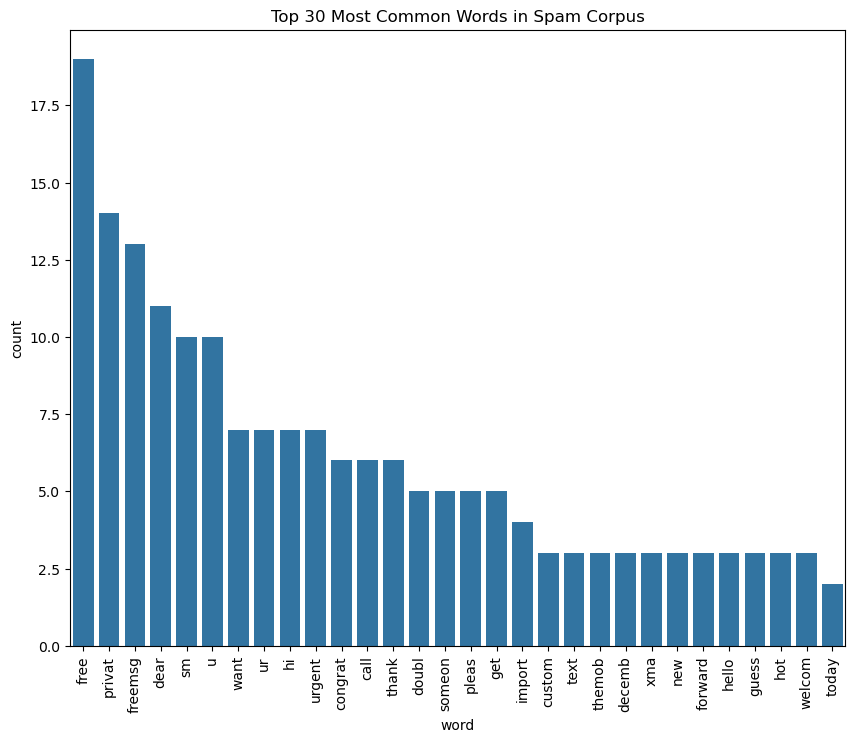

In [68]:
plt.figure(figsize=(10, 8))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [69]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].dropna().tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

2404

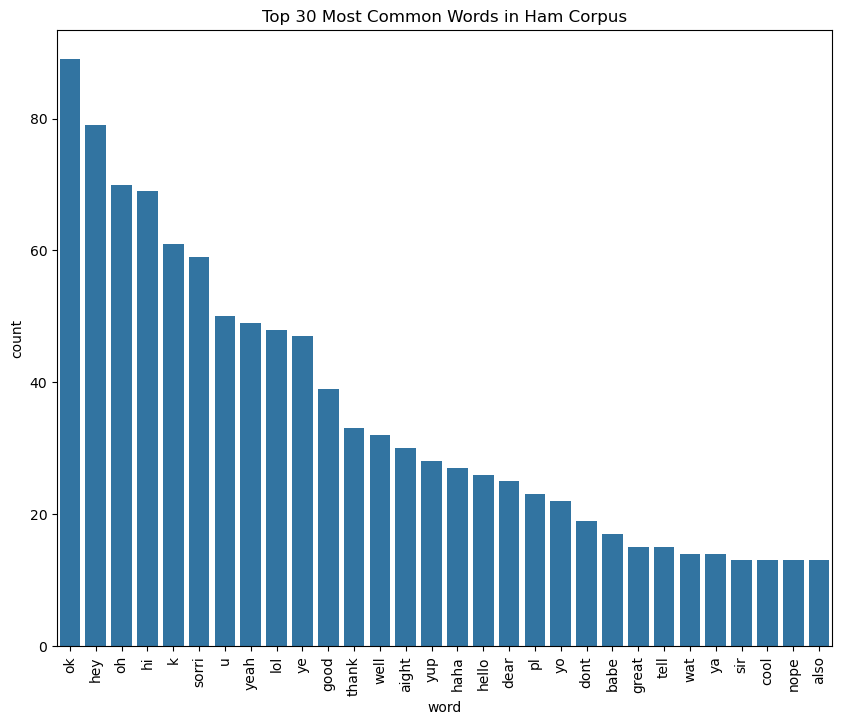

In [103]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the most common words in the ham corpus
ham_word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the Counter object
ham_df = pd.DataFrame(ham_word_counts, columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()


In [104]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


4. model Building 

In [105]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()


In [106]:
tfidf = TfidfVectorizer(max_features=3000)

In [107]:
df['transformed_text']=df['transformed_text'].astype(str).fillna('')

In [108]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [109]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [110]:
X.shape

(4598, 798)

In [111]:
y = df['target'].values

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3565217391304348
[[263 584]
 [  8  65]]
0.10015408320493066


In [117]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9304347826086956
[[847   0]
 [ 64   9]]
1.0


In [118]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9239130434782609
[[847   0]
 [ 70   3]]
1.0


In [119]:
# tfidf --> MNB


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [122]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [123]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [124]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9347826086956522, 0.8095238095238095)

In [125]:
X_train.score()

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [126]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9347826086956522
Precision -  0.8095238095238095
For  KN
Accuracy -  0.9282608695652174
Precision -  0.6296296296296297
For  NB
Accuracy -  0.9304347826086956
Precision -  1.0
For  DT
Accuracy -  0.9293478260869565
Precision -  1.0
For  LR
Accuracy -  0.9358695652173913
Precision -  0.85
For  RF
Accuracy -  0.9369565217391305
Precision -  0.8


C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9347826086956522
Precision -  0.782608695652174
For  BgC
Accuracy -  0.9369565217391305
Precision -  0.8
For  ETC
Accuracy -  0.9369565217391305
Precision -  0.8260869565217391
For  GBDT
Accuracy -  0.9293478260869565
Precision -  1.0
For  xgb
Accuracy -  0.9239130434782609
Precision -  1.0


In [127]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [128]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.930435,1.000000
3,DT,0.929348,1.000000
9,GBDT,0.929348,1.000000
10,xgb,0.923913,1.000000
4,LR,0.935870,0.850000
8,ETC,0.936957,0.826087
0,SVC,0.934783,0.809524
5,RF,0.936957,0.800000
7,BgC,0.936957,0.800000
6,AdaBoost,0.934783,0.782609


In [129]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

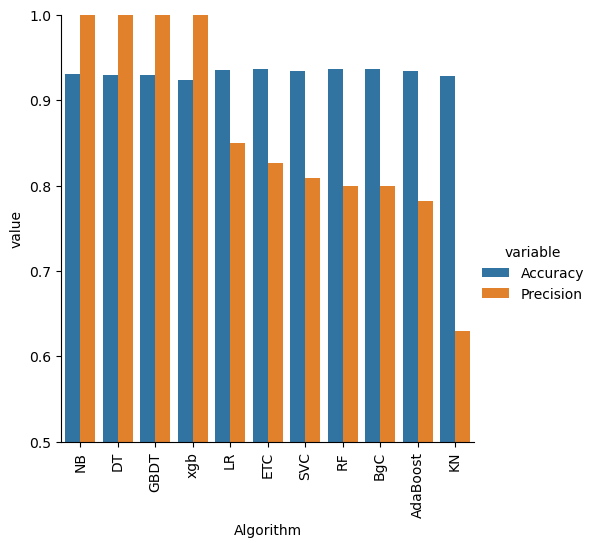

In [130]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [131]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [134]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [135]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [136]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [137]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.930435,1.000000,0.930435,1.000000,0.930435,1.000000,0.930435,1.000000
1,DT,0.929348,1.000000,0.929348,1.000000,0.929348,1.000000,0.929348,1.000000
2,GBDT,0.929348,1.000000,0.929348,1.000000,0.929348,1.000000,0.929348,1.000000
3,xgb,0.923913,1.000000,0.923913,1.000000,0.923913,1.000000,0.923913,1.000000
4,LR,0.935870,0.850000,0.935870,0.850000,0.935870,0.850000,0.935870,0.850000
5,ETC,0.936957,0.826087,0.936957,0.826087,0.936957,0.826087,0.936957,0.826087
6,SVC,0.934783,0.809524,0.934783,0.809524,0.934783,0.809524,0.934783,0.809524
7,RF,0.936957,0.800000,0.936957,0.800000,0.936957,0.800000,0.936957,0.800000
8,BgC,0.936957,0.800000,0.936957,0.800000,0.936957,0.800000,0.936957,0.800000
9,AdaBoost,0.934783,0.782609,0.934783,0.782609,0.934783,0.782609,0.934783,0.782609


In [138]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [139]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [140]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [145]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9369565217391305
Precision 0.8260869565217391


In [146]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [147]:
from sklearn.ensemble import StackingClassifier

In [148]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [149]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9358695652173913
Precision 0.7333333333333333


In [150]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))